In [9]:
%matplotlib inline

import json
import glob
import re
import itertools
import functools

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

mpl.rc('font', family='Arial', size=12)

In [10]:
nuc_content = pd.read_csv('genome_correlations/nucleotide_content.tsv', sep='\t')

In [11]:
nuc_content.columns

Index(['chr', 'start', 'end', 'ucsc_name', 'region_type', 'strand', 'pct_at',
       'pct_gc', 'num_A', 'num_C', 'num_G', 'num_T', 'num_N', 'num_oth',
       'seq_len'],
      dtype='object')

In [12]:
nuc_content.head()

,chr,start,end,ucsc_name,region_type,strand,pct_at,pct_gc,num_A,num_C,num_G,num_T,num_N,num_oth,seq_len
0,chr10,118334320,118334820,chr10:118297929-118342320;-,ns,-,0.564,0.436,120,151,67,162,0,0,500
1,chr10,118333820,118334320,chr10:118297929-118342320;-,ns,-,0.590,0.410,157,133,72,138,0,0,500
2,chr10,118333320,118333820,chr10:118297929-118342320;-,ns,-,0.632,0.368,157,95,89,159,0,0,500
3,chr10,118332820,118333320,chr10:118297929-118342320;-,faster,-,0.668,0.332,196,76,90,138,0,0,500
4,chr10,118332320,118332820,chr10:118297929-118342320;-,slower,-,0.578,0.422,167,155,56,122,0,0,500


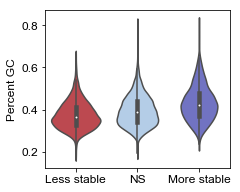

In [13]:
fig,ax = plt.subplots(figsize=(3.5,(0.945)*3))
sns.violinplot(
 x = 'region_type',
 y = 'pct_gc',
 data = nuc_content,
 order = ['faster', 'ns', 'slower'],
 palette=['#cf363f','#abcdef', '#6366cf'],
 ax=ax
)
ax.set_ylabel('Percent GC', fontsize=12)
ax.set_xlabel('')
ax.set_xticklabels(['Less stable', 'NS', 'More stable'], fontsize=12)
fig.tight_layout()
fig.savefig('Correlation_to_gc_content.pdf', transparent=True)

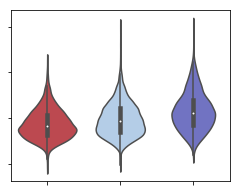

In [14]:
fig,ax = plt.subplots(figsize=(3.5,(0.945)*3))
sns.violinplot(
 x = 'region_type',
 y = 'pct_gc',
 data = nuc_content,
 order = ['faster', 'ns', 'slower'],
 palette=['#cf363f','#abcdef', '#6366cf'],
 ax=ax
)
ax.set_ylabel('', fontsize=12)
ax.set_yticks([0.2, 0.4, 0.6, 0.8])
ax.set_yticklabels('')
ax.set_xticklabels('')
ax.set_xlabel('')
fig.tight_layout()
fig.savefig('Correlation_to_gc_content.svg', transparent=True)

In [15]:
plt.show(ax)

In [16]:
stats.kruskal(nuc_content.loc[nuc_content.region_type == 'slower', 'pct_gc'], 
              nuc_content.loc[nuc_content.region_type == 'ns', 'pct_gc'], 
              nuc_content.loc[nuc_content.region_type == 'faster', 'pct_gc'])

KruskalResult(statistic=656.6889888745842, pvalue=2.5223067526508954e-143)

In [17]:
stats.kruskal(nuc_content.loc[nuc_content.region_type == 'slower', 'pct_gc'], 
              nuc_content.loc[nuc_content.region_type == 'faster', 'pct_gc'])

KruskalResult(statistic=515.0972609304422, pvalue=4.934092998396332e-114)

In [18]:
nuc_content['g_skew'] = (nuc_content.num_G - nuc_content.num_C)/(nuc_content.num_G + nuc_content.num_C)
nuc_content['a_skew'] = (nuc_content.num_A - nuc_content.num_T)/(nuc_content.num_A + nuc_content.num_T)

In [19]:
nuc_content.loc[nuc_content.strand == '-', 'g_skew'] = -nuc_content.loc[nuc_content.strand == '-', 'g_skew']
nuc_content.loc[nuc_content.strand == '-', 'a_skew'] = -nuc_content.loc[nuc_content.strand == '-', 'a_skew']


In [20]:
stats.kruskal(nuc_content.loc[nuc_content.region_type == 'slower', 'g_skew'], 
              nuc_content.loc[nuc_content.region_type == 'ns', 'g_skew'], 
              nuc_content.loc[nuc_content.region_type == 'faster', 'g_skew'])

KruskalResult(statistic=33.587136370938524, pvalue=5.089158834628709e-08)

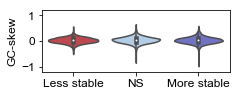

In [24]:
fig, ax = plt.subplots(figsize=(3.5,1.5))
sns.violinplot(
 x = 'region_type',
 y = 'g_skew',
 data = nuc_content,
 order = ['faster', 'ns', 'slower'],
 palette=['#cf363f','#abcdef', '#6366cf']
)
ax.set_ylabel('GC-skew')
ax.set_ylim(-1.2,1.2)
ax.set_xlabel('')
ax.set_xticklabels(['Less stable', 'NS', 'More stable'])
fig.tight_layout()
fig.savefig('Correlation_to_g_skew.pdf', transparent=True)
fig.savefig('Correlation_to_g_skew.svg', transparent=True)

In [22]:
nuc_content.groupby('region_type').g_skew.mean()

region_type
faster    0.028349
ns        0.042458
slower    0.033807
Name: g_skew, dtype: float64

In [36]:
nuc_content.groupby('region_type').g_skew.agg(['mean', 'std'])

,mean,std
region_type,,
faster,0.028349,0.113512
ns,0.042458,0.126772
slower,0.033807,0.127063


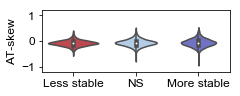

In [25]:
fig, ax = plt.subplots(figsize=(3.5,1.5))
sns.violinplot(
 x = 'region_type',
 y = 'a_skew',
 data = nuc_content,
 order = ['faster', 'ns', 'slower'],
 palette=['#cf363f','#abcdef', '#6366cf']
)
ax.set_ylabel('AT-skew')
ax.set_ylim(-1.2,1.2)
ax.set_xlabel('')
ax.set_xticklabels(['Less stable', 'NS', 'More stable'])
fig.tight_layout()
fig.savefig('Correlation_to_a_skew.svg', transparent=True)

In [38]:
nuc_content.groupby('region_type').g_skew.agg(['mean', 'std'])

,mean,std
region_type,,
faster,0.028349,0.113512
ns,0.042458,0.126772
slower,0.033807,0.127063


In [39]:
stats.kruskal(nuc_content.loc[nuc_content.region_type == 'slower', 'a_skew'], 
              nuc_content.loc[nuc_content.region_type == 'ns', 'a_skew'], 
              nuc_content.loc[nuc_content.region_type == 'faster', 'a_skew'])

KruskalResult(statistic=26.478884682466408, pvalue=1.7790299017675685e-06)